# WEB SCRAPPING World Bank Data using API 

  WBGAPI provides modern, pythonic access to the World Bank's data API.

In [1]:
pip install wbgapi

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings as w
w.simplefilter(action = 'ignore', category = FutureWarning)

import wbgapi as wb
import pandas as pd 
import seaborn as sn
import matplotlib 
from matplotlib import pyplot as plt

%matplotlib inline

#### Total Database Available in World Bank Data

In [3]:
wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2022-07-20
3,Worldwide Governance Indicators,WGI,3,2021-09-27
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-01-14
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2020-12-20
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2022-06-23
15,Global Economic Monitor,GEM,3,2020-07-27


In [4]:
## To quickly look down the Countries Economy  
## wb.economy.info()

In [5]:
wb.income.info()

id,value
HIC,High income
INX,Not classified
LIC,Low income
LMC,Lower middle income
LMY,Low & middle income
MIC,Middle income
UMC,Upper middle income
,7 elements


##### Quick Index
- AFE = Africa Eastern and Southern
*AFW = Africa Western and Central
*ARB = Arab World
*EAP = East Asia & Pacific (excluding high income)
*EAS = East Asia & Pacific
*ECA = Europe & Central Asia (excluding high income)
*ECS = Europe & Central Asia
*EMU = Euro area
*EUU = European Union
*HIC = High income
*LAC = Latin America & Caribbean (excluding high income)
*LCN = Latin America & Caribbean
*LDC = Least developed countries: UN classification
*LIC = Low income
*LMC = Lower middle income
*LMY = Low & middle income
*MEA = Middle East & North Africa
*MIC = Middle income
*NAC = North America
*OED = OECD members
*SSF = Sub-Saharan Africa
*UMC = Upper middle income
*WLD = World

 For filtering to lets say Low income countries, we can use the code wb.economy.info(wb.income.members('LIC'))

###### Filtering through Country's ISO codes

In [6]:
wb.economy.info(['FRA', 'USA', 'LVA', 'ESP', 'DEU','ARE'])

id,value,region,incomeLevel
FRA,France,ECS,HIC
DEU,Germany,ECS,HIC
LVA,Latvia,ECS,HIC
ESP,Spain,ECS,HIC
ARE,United Arab Emirates,MEA,HIC
USA,United States,NAC,HIC
,6 elements,,


#### To get the metadata 


In [7]:
wb.series.metadata.get('NY.GDP.PCAP.PP.KD')

Field,Value
Aggregationmethod,Weighted average
BasePeriod,2017
IndicatorName,"GDP per capita, PPP (constant 2017 international $)"
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Longdefinition,GDP per capita based on purchasing power parity (PPP). PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. GDP at purchaser's prices is the sum of gross value added by all resident producers in the country plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in constant 2017 international dollars.
Periodicity,Annual
Source,"International Comparison Program, World Bank | World Development Indicators database, World Bank | Eurostat-OECD PPP Programme."
Statisticalconceptandmethodology,"For the concept and methodology of 2017 PPP, please refer to the International Comparison Program (ICP)’s website (https://www.worldbank.org/en/programs/icp)."
Topic,Economic Policy & Debt: Purchasing power parity


### Map View

In [17]:
import plotly.express as px

df= wb.data.DataFrame('NY.GDP.PCAP.PP.KD', 
                                time=range(2015,2022),
                                labels=True,
                                skipAggs=True, 
                                skipBlanks=True, 
                                columns='series').reset_index()

px.choropleth(
    df.query("Time == '2021'"),
    locations = "economy",
    color = "NY.GDP.PCAP.PP.KD",
    hover_name = "Country",
    color_continuous_scale = px.colors.sequential.Plasma,
    projection = "natural earth",
    labels = {"NY.GDP.PCAP.PP.KD": "GDP per capita"}
     )

#### So, Lets look at the 'Health Nutrition and Population Statistics' database 

In [18]:
# The identification number of the database is 16 (441 elements)

wb.series.info(db = 16)

id,value
HD.HCI.OVRL,Human capital index (HCI) (scale 0-1)
HD.HCI.OVRL.FE,"Human capital index (HCI), female (scale 0-1)"
HD.HCI.OVRL.LB,"Human capital index (HCI), lower bound (scale 0-1)"
HD.HCI.OVRL.LB.FE,"Human capital index (HCI), female, lower bound (scale 0-1)"
HD.HCI.OVRL.LB.MA,"Human capital index (HCI), male, lower bound (scale 0-1)"
HD.HCI.OVRL.MA,"Human capital index (HCI), male (scale 0-1)"
HD.HCI.OVRL.UB,"Human capital index (HCI), upper bound (scale 0-1)"
HD.HCI.OVRL.UB.FE,"Human capital index (HCI), female, upper bound (scale 0-1)"
HD.HCI.OVRL.UB.MA,"Human capital index (HCI), male, upper bound (scale 0-1)"
NY.GNP.PCAP.CD,"GNI per capita, Atlas method (current US$)"


                  We shall be using 'Health Nutrition and Population Statistics' database i.e., db = 16 
                                                   and obtain insights.

### Importing DATA

In [19]:
#For better understanding while creating dataframe

help(wb.data.DataFrame)

Help on function DataFrame in module wbgapi.data:

DataFrame(series, economy='all', time='all', index=None, columns=None, mrv=None, mrnev=None, skipBlanks=False, labels=False, skipAggs=False, numericTimeKeys=False, timeColumns=False, params={}, db=None, **dimensions)
    Retrieve a 2-dimensional pandas dataframe. 
    
    Arguments:
        series:             a series identifier or list-like, e.g., SP.POP.TOTL
    
        economy:            an economy identifier or list-like, e.g., 'BRA' or ['USA', 'CAN', 'MEX']
    
        time:               a time identifier or list-like, e.g., 'YR2015' or range(2010,2020).
                            Both element keys and values are acceptable
    
        index:              name or list of dimensions for the DataFrame's index, e.g., 'economy'. If None then the function
                            will define the index based on your request. Note: to get a dataframe with no index
                            (i.e., 0-based integers) call `rese

In [20]:
# fetching the population of Latvia, France, Germany, United Kingdom and Netherlands 

population = wb.data.DataFrame('SP.POP.TOTL',['LVA', 'FRA', 'DEU', 'GBR','NLD'], range(2011,2023,2), labels=True)

population

,Country,YR2011,YR2013,YR2015,YR2017,YR2019,YR2021
economy,,,,,,,
NLD,Netherlands,16693074.0,16804432.0,16939923.0,17131296.0,17344874.0,17533405.0
GBR,United Kingdom,63258810.0,64128273.0,65116219.0,66058859.0,66836327.0,67326569.0
DEU,Germany,80274983.0,80645605.0,81686611.0,82657002.0,83092962.0,83129285.0
FRA,France,65342789.0,65998685.0,66548272.0,66918020.0,67248926.0,67499343.0
LVA,Latvia,2059709.0,2012647.0,1977527.0,1942248.0,1913822.0,1883162.0


            The Total Population of Latvia as in 2021 is 1,883,162 

##### Plotting a Line graph for the year 2021

<AxesSubplot:title={'center':'Total Population'}, xlabel='Country', ylabel='per 10 million'>

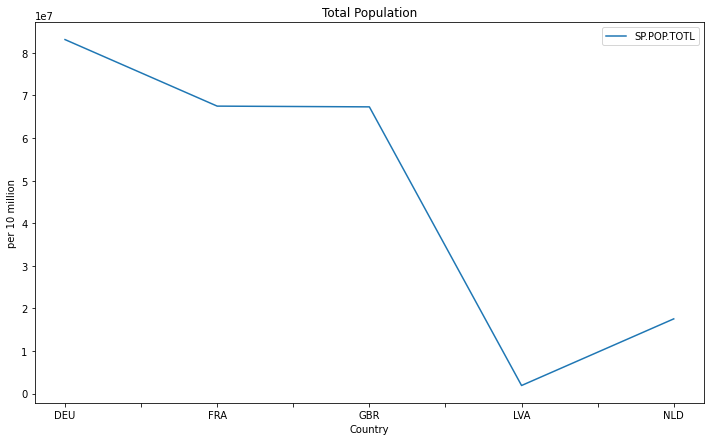

In [21]:
wb.data.DataFrame('SP.POP.TOTL',['LVA', 'FRA', 'DEU', 'GBR','NLD'],mrnev=1).plot(figsize =(12,7),xlabel = 'Country', 
                                                                                 ylabel = 'per 10 million', 
                                                                                 title ='Total Population' )


            As Per the Graph, Highest Population is in Germany and Lowest in Latvia (as of 2021)

In [22]:
tp = wb.data.DataFrame(['SP.POP.TOTL.FE.IN','SP.POP.TOTL.MA.IN'],
                  ['LVA', 'FRA', 'DEU', 'GBR','NLD'], mrnev=1).join(wb.economy.DataFrame()['capitalCity'])

tp

,SP.POP.TOTL.FE.IN,SP.POP.TOTL.MA.IN,capitalCity
economy,,,
DEU,42010590.0,41118695.0,Berlin
FRA,34833461.0,32665882.0,Paris
GBR,34045551.0,33281018.0,London
LVA,1014633.0,868529.0,Riga
NLD,8794772.0,8738633.0,Amsterdam


               **Female**       **Male**

#### Finding the Literacy rate of Youth from the age of 15-24 years (most recent values entered in the WORLD BANK DATABASE)

In [23]:
pd.set_option('display.max_rows',None)

wb.data.DataFrame('SE.ADT.1524.LT.ZS',['LVA', 'ESP', 'UZB','CHN','IND','USA','POL','BTN','NEP'], 
                  mrnev=1, timeColumns=True,skipBlanks=True).sort_values('SE.ADT.1524.LT.ZS',ascending=False)

,SE.ADT.1524.LT.ZS,SE.ADT.1524.LT.ZS:T
economy,,
UZB,99.999924,2019
LVA,99.820000,2018
POL,99.796829,2008
CHN,99.783600,2018
ESP,99.621422,2020
BTN,93.090630,2017
IND,91.664040,2018


    Youth Literacy is Highest in UZB (Uzbekistan) followed by LVA (Latvia) and Lowest in IND (India) among 9 countries

#### Lowest Youth Literacy rate as per the WORLD BANK DATABASE

In [24]:
wb.data.DataFrame('SE.ADT.1524.LT.ZS',
                      mrnev=1, timeColumns=True,skipBlanks=True).sort_values('SE.ADT.1524.LT.ZS',ascending= True).head(10)

,SE.ADT.1524.LT.ZS,SE.ADT.1524.LT.ZS:T
economy,,
SOM,13.140000,1972
TCD,30.791611,2016
CAF,38.268650,2018
NER,43.459999,2018
MLI,46.157341,2020
SSD,47.900959,2018
GIN,53.940521,2018
LBR,55.398701,2017
AFG,55.929401,2021


As per the database of WORLD BANK, 10 Lowest **Youth Literacy Rate** is given as above along with the year updated, 

Index

- Somalia
- Chad
- Central African Republic
- Nigeria
- Mali 
- South Sudan
- Guinea
- Liberia
- Afghanistan
- Burkina Faso

                      Sorting countries according to the most number of deaths, ages (20-24)

In [25]:
cd = wb.data.DataFrame('SH.DTH.2024',['LVA', 'FRA', 'DEU', 'GBR','NLD', 'ESP','CHE', 'CZE','ITA', 'LTU','POL','SWE'], 
                  mrnev=1, timeColumns=True).sort_values('SH.DTH.2024', ascending=False).head(12)

cd

,SH.DTH.2024,SH.DTH.2024:T
economy,,
GBR,1567.0,2020
FRA,1402.0,2020
DEU,1340.0,2020
POL,1120.0,2020
ITA,798.0,2020
ESP,574.0,2020
NLD,286.0,2020
SWE,247.0,2020
CZE,211.0,2020


            United Kindom has the most number of youth deaths and Latvia has the lowest as of 2020

<AxesSubplot:title={'center':'Youth Deaths'}, xlabel='Country', ylabel='Count'>

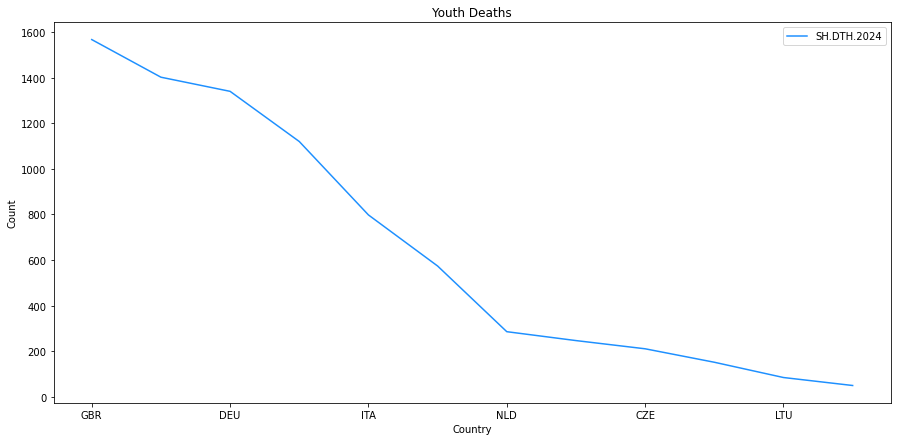

In [26]:
# plotting 
cd.plot(figsize =(15,7), xlabel = 'Country', color = 'dodgerblue', title = 'Youth Deaths', ylabel = 'Count')

##### Co2 emmiters per capita as of 2019

In [27]:
 wb.data.DataFrame('EN.ATM.CO2E.PC',['LVA', 'FRA', 'DEU', 'GBR','NLD', 'ESP','CHE', 'CZE','ITA', 'LTU','POL','SWE'],
                   mrnev=1).join(wb.economy.DataFrame()['capitalCity'])
    

,EN.ATM.CO2E.PC,capitalCity
economy,,
CHE,4.359041,Bern
CZE,9.022786,Prague
DEU,7.911621,Berlin
ESP,5.091351,Madrid
FRA,4.468770,Paris
GBR,5.220514,London
ITA,5.311315,Rome
LTU,4.198076,Vilnius
LVA,3.955436,Riga


### Birthrate and Deathrate, crude (per 1000 person) as of 2020

In [28]:
bdr = wb.data.DataFrame(['SP.DYN.CBRT.IN','SP.DYN.CDRT.IN'],['LVA', 'FRA', 'DEU', 
                                                            'GBR','NLD', 'ESP','CHE', 'CZE','ITA', 
                                                             'LTU','POL','SWE'],
                   mrnev=1, timeColumns=1).join(wb.economy.DataFrame()['capitalCity'])

bdr.sort_values('SP.DYN.CDRT.IN', ascending=False)

,SP.DYN.CBRT.IN,SP.DYN.CBRT.IN:T,SP.DYN.CDRT.IN,SP.DYN.CDRT.IN:T,capitalCity
economy,,,,,
LTU,9.0,2020,15.6,2020,Vilnius
LVA,9.2,2020,15.2,2020,Riga
ITA,6.8,2020,12.6,2020,Rome
POL,9.4,2020,12.6,2020,Warsaw
CZE,10.3,2020,12.1,2020,Prague
DEU,9.3,2020,11.9,2020,Berlin
ESP,7.1,2020,10.4,2020,Madrid
GBR,10.2,2020,10.4,2020,London
FRA,10.9,2020,9.9,2020,Paris


                Birth                          Death
                Rate                           Rate
                
                
#### Highest Death Rate is in Lithuania followed by Latvia
#### Highest Birth Rate is in Sweden and France followed by Czech Republic

<AxesSubplot:title={'center':'BirthRatio vs DeathRatio'}, xlabel='Country', ylabel='Rate per 1000'>

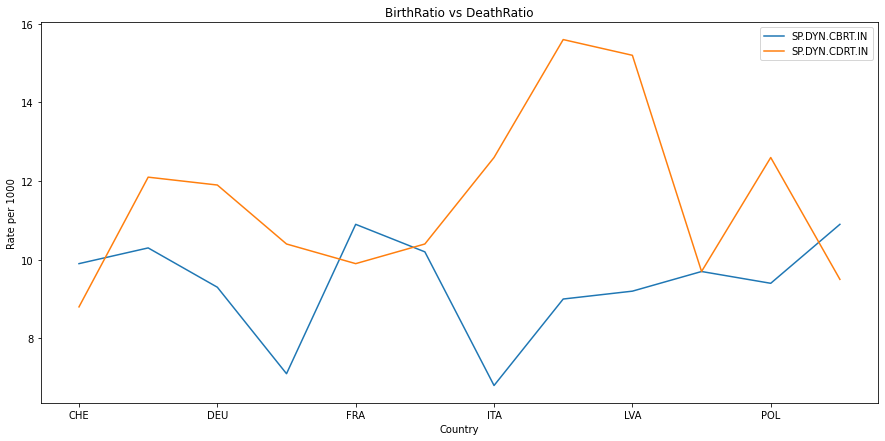

In [29]:
bdr.plot(figsize = (15,7), xlabel = 'Country', title = 'BirthRatio vs DeathRatio', ylabel = 'Rate per 1000')

#### Total Labour Force as of 2021

In [30]:
total_labour_force = wb.data.DataFrame('SL.TLF.TOTL.IN',
                      ['LVA', 'FRA', 'DEU', 'GBR','NLD', 'ESP','CHE', 'CZE','ITA', 'LTU','POL','SWE'],
                      mrnev = 1).sort_values('SL.TLF.TOTL.IN', ascending=False)

total_labour_force

,SL.TLF.TOTL.IN
economy,
DEU,43848015.0
GBR,34653319.0
FRA,30972593.0
ITA,24954973.0
ESP,23307968.0
POL,18254003.0
NLD,9897689.0
SWE,5559530.0
CZE,5377683.0


<AxesSubplot:title={'center':'Labour Force Total'}, xlabel='Country', ylabel='Per 10 million'>

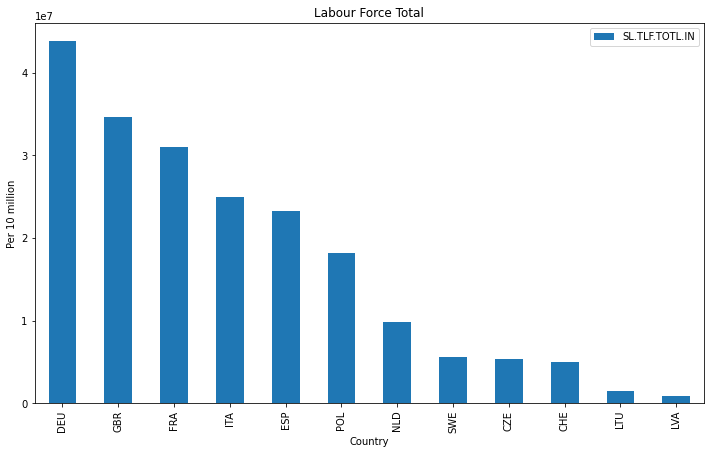

In [31]:
total_labour_force.plot.bar(figsize = (12,7), title = 'Labour Force Total', ylabel = 'Per 10 million', xlabel = 'Country')

#### Total Unemployement Percentage of Labour Force as of 2021

In [32]:
unemp = wb.data.DataFrame(['SL.UEM.TOTL.ZS','SL.UEM.TOTL.MA.ZS','SL.UEM.TOTL.FE.ZS'],  
                  ['LVA', 'FRA', 'DEU', 'GBR','NLD', 'ESP','CHE', 'CZE','ITA', 'LTU','POL','SWE'],
                  mrnev=1).join(wb.economy.DataFrame()['capitalCity'])

unemp

,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,capitalCity
economy,,,,
CHE,5.618,5.062,5.321,Bern
CZE,3.639,2.289,2.887,Prague
DEU,3.164,3.865,3.535,Berlin
ESP,16.781,12.918,14.733,Madrid
FRA,8.012,8.110,8.063,Paris
GBR,4.301,4.728,4.526,London
ITA,11.256,8.781,9.834,Rome
LTU,7.468,8.346,7.903,Vilnius
LVA,6.886,8.313,7.600,Riga


         Unemployed % of total, male, female labour force respectively as of 2021

<AxesSubplot:xlabel='economy'>

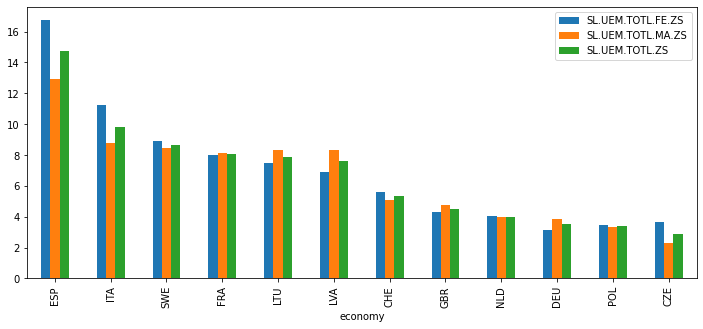

In [33]:
unemp.sort_values('SL.UEM.TOTL.ZS',ascending=False).plot.bar(figsize = (12,5))

#### Total alcohol consumption per capita,Female and Male (liters of pure alcohol, projected estimates, male 15+ years of age) as of 2018

In [34]:
alc_consp = wb.data.DataFrame(['SH.ALC.PCAP.MA.LI','SH.ALC.PCAP.FE.LI'], 
                              ['LVA', 'FRA', 'DEU', 'GBR','NLD', 'ESP','CHE', 'CZE','ITA', 'LTU','POL','SWE'],
                                      mrnev=1).join(wb.economy.DataFrame()['capitalCity'])

alc_consp.sort_values('SH.ALC.PCAP.MA.LI', ascending=False)

,SH.ALC.PCAP.FE.LI,SH.ALC.PCAP.MA.LI,capitalCity
economy,,,
CZE,6.99,22.28,Prague
LTU,6.56,21.29,Vilnius
LVA,6.11,20.92,Riga
ESP,5.77,20.07,Madrid
DEU,6.21,19.90,Berlin
FRA,5.83,19.18,Paris
POL,5.58,18.41,Warsaw
GBR,5.39,17.76,London
CHE,5.60,17.65,Bern


                   Female            Male
              

In [35]:
alc_cons_total = wb.data.DataFrame('SH.ALC.PCAP.LI',
                                   ['LVA', 'FRA', 'DEU', 'GBR','NLD', 'ESP','CHE', 'CZE','ITA', 'LTU','POL','SWE'],
                                    mrnev = 1).sort_values('SH.ALC.PCAP.LI',ascending = False)

alc_cons_total

,SH.ALC.PCAP.LI
economy,
CZE,14.45
LTU,13.22
DEU,12.91
LVA,12.77
ESP,12.72
FRA,12.33
POL,11.71
CHE,11.53
GBR,11.45


#### Total alcohol consumption per capita (liters of pure alcohol, projected estimates, male 15+ years of age) as of 2018

<AxesSubplot:title={'center':'Total Alcohol Consumption (Liters of pure alcohol, projected estimates, 15+ years of age)'}, xlabel='Country', ylabel='%Count'>

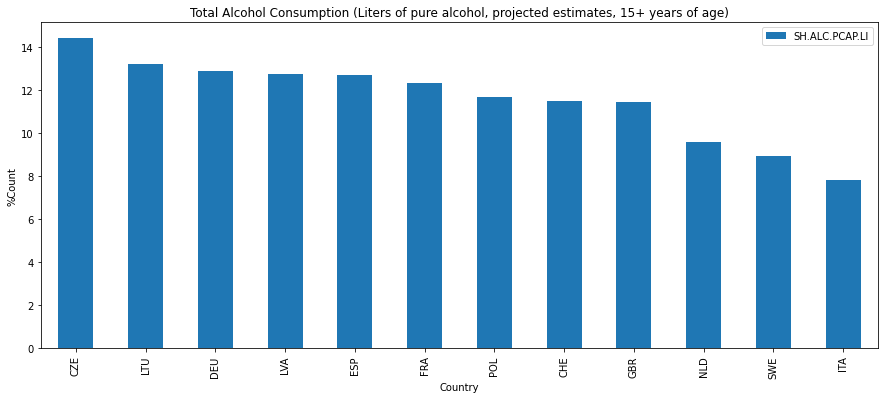

In [36]:
alc_cons_total.plot.bar(figsize = (15,6), 
                        title = 'Total Alcohol Consumption (Liters of pure alcohol, projected estimates, 15+ years of age)',
                        xlabel = 'Country',
                        ylabel = '%Count')

                  The most alcohol consumption is in Czech Republic and lowest in Italy as of 2018 data

#### References
- https://pypi.org/project/wbgapi/
-https://towardsdatascience.com/access-a-world-of-data-with-wbgapi-61849354f769
-https://blogs.worldbank.org/opendata/introducing-wbgapi-new-python-package-accessing-world-bank-data
-https://nbviewer.org/github/tgherzog/wbgapi/blob/master/examples/wbgapi-cookbook.ipynb
-https://towardsdatascience.com/statistical-indexes-for-measuring-inequality-7f2ca72fd65e
-https://deepnote.com/@carlos-mendez/PYTHON-World-Bank-data-7d57b121-2bdf-4f13-b8d9-9520c9f8a7cc